In [11]:
from frequencies import PositionalFrequencies
import joblib, os, tqdm
import torch

from sampling.importance_sampler import ImportanceSampler
from transformers import GPT2TokenizerFast

MODEL_NAME = "EleutherAI/gpt-neo-125M"
sampler = ImportanceSampler(MODEL_NAME)
tokenizer = sampler.tokenizer


Using pad_token, but it is not set yet.


Importing classes for model EleutherAI/gpt-neo-125M
 -> <class 'transformers.models.gpt2.tokenization_gpt2.GPT2Tokenizer'>
 -> <class 'transformers.models.gpt_neo.modeling_gpt_neo.GPTNeoForCausalLM'>
Vocabulary size: 50257


**Scatter plot: bigram counts**

Fix t1. Select subset of tokens T and plot the following:
- Y-axis: conditional empirical frequencies $p(t | t1)$ for $t \in T$.
- X-axis: one-step ahead language model probability $ p_\theta(t | t1)$ for $t \in T$.

In [8]:
results = sampler.batch_estimate_not_occurring(
    input_str="Introduction",
    avoid_terms=" {",
    num_sequences=32,
    max_num_tokens=1,
    seed=20230206,
    return_logits=True,
)

0it [00:00, ?it/s]
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 100.51it/s]
1it [00:00, 81.10it/s]


In [21]:
logits = results.logits[0][0,:].cpu()
logits

tensor([-11.9160, -12.0531, -12.9450,  ..., -23.3004, -18.5876,  -7.9974],
       grad_fn=<ToCopyBackward0>)

In [25]:
import pandas as pd

cond_token_198 = pd.read_csv("../experiments/PILE-30-bigrams-agg/bigrams_starting_with_198.csv", index_col=0)
model_logits = torch.tensor(cond_token_198["t2"].values)
cond_token_198["log p_M(t2 | t1)"] = (logits[model_logits]).tolist()
cond_token_198.head()

,t2,counts,t1,p_D(t2 | t1),log p_D(t2 | t1)
0,397,29,198,6.780991e-06,-11.901387
1,9800,4,198,9.353091e-07,-13.882389
2,12,8172,198,1.910837e-03,-6.260214
3,4475,2,198,4.676546e-07,-14.575536
4,220,10478,198,2.450042e-03,-6.011650


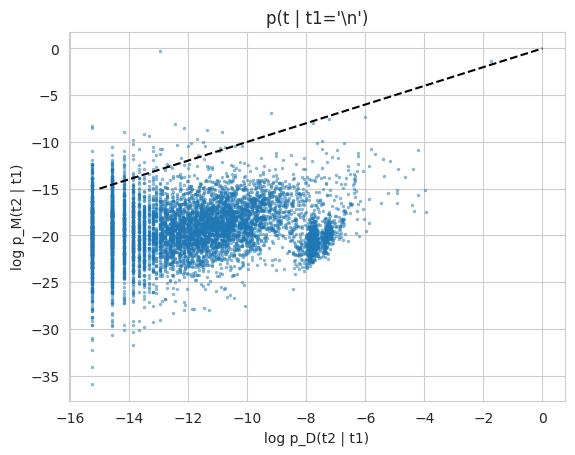

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")


sns.scatterplot(
    x=cond_token_198["log p_D(t2 | t1)"],
    y=cond_token_198["log p_M(t2 | t1)"],
    edgecolor=None,
    alpha=0.5,
    s=5,
)
plt.plot([-15, 0], [-15, 0], color="black", ls="--")
plt.title("p(t | t1='\\n')")
plt.show()

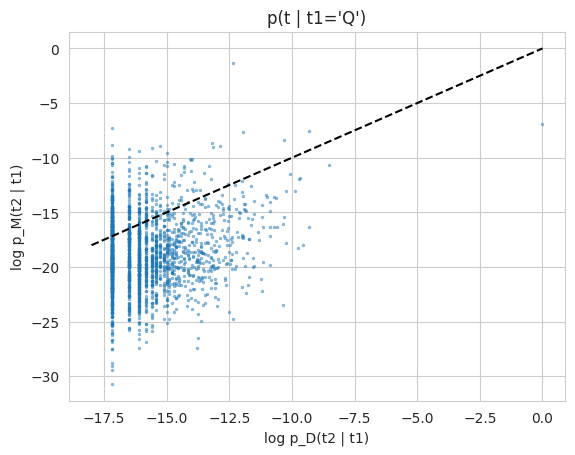

In [58]:
import pandas as pd

cond_token_48 = pd.read_csv("./bigrams_starting_with_48.csv", index_col=0)
model_logits = torch.tensor(cond_token_48["t2"].values)
cond_token_48["log p_M(t2 | t1)"] = (logits[model_logits]).tolist()
cond_token_48.head()

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")


sns.scatterplot(
    x=cond_token_48["log p_D(t2 | t1)"],
    y=cond_token_48["log p_M(t2 | t1)"],
    edgecolor=None,
    alpha=0.5,
    s=5,
)
plt.plot([-18, 0], [-18, 0], color="black", ls="--")
plt.title("p(t | t1='Q')")
plt.show()

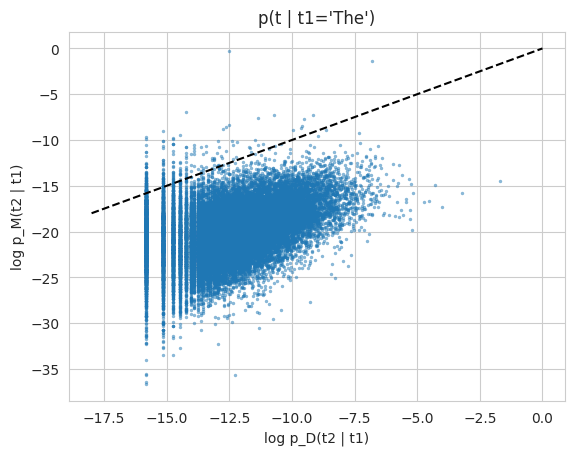

In [59]:
import pandas as pd

cond_token_464 = pd.read_csv("./bigrams_starting_with_464.csv", index_col=0)
model_logits = torch.tensor(cond_token_464["t2"].values)
cond_token_464["log p_M(t2 | t1)"] = (logits[model_logits]).tolist()
cond_token_464.head()

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")


sns.scatterplot(
    x=cond_token_464["log p_D(t2 | t1)"],
    y=cond_token_464["log p_M(t2 | t1)"],
    edgecolor=None,
    alpha=0.5,
    s=5,
)
plt.plot([-18, 0], [-18, 0], color="black", ls="--")
plt.title("p(t | t1='The')")
plt.show()

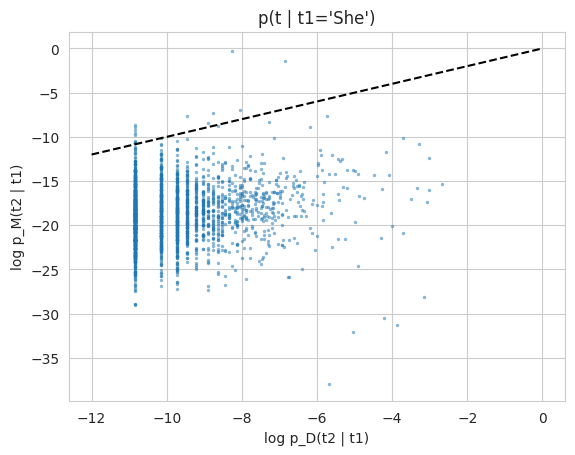

0.7361457834201386

In [84]:
tokenizer.encode("She")

import pandas as pd

cond_token_3347 = pd.read_csv("./bigrams_starting_with_3347.csv", index_col=0)
model_logits = torch.tensor(cond_token_3347["t2"].values)
cond_token_3347["log p_M(t2 | t1)"] = (logits[model_logits]).tolist()
cond_token_3347.head()

sns.scatterplot(
    x=cond_token_3347["log p_D(t2 | t1)"],
    y=cond_token_3347["log p_M(t2 | t1)"],
    edgecolor=None,
    alpha=0.5,
    s=5,
)
plt.plot([-12, 0], [-12, 0], color="black", ls="--")
plt.title("p(t | t1='She')")
plt.show()
np.exp(cond_token_3347["log p_M(t2 | t1)"]).max()

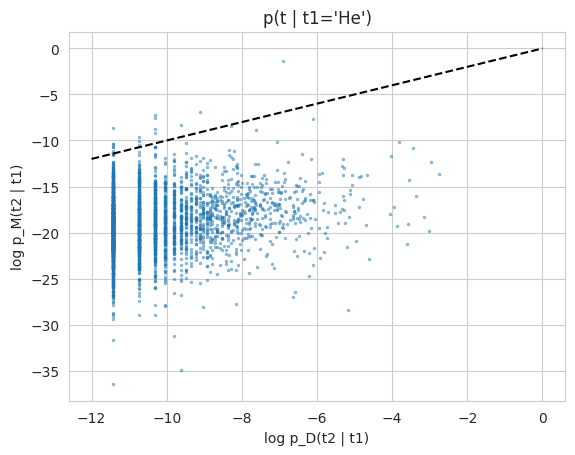

In [85]:
tokenizer.encode("He")

cond_token_1544 = pd.read_csv("./bigrams_starting_with_1544.csv", index_col=0)
model_logits = torch.tensor(cond_token_1544["t2"].values)
cond_token_1544["log p_M(t2 | t1)"] = (logits[model_logits]).tolist()
cond_token_1544.head()

sns.scatterplot(
    x=cond_token_1544["log p_D(t2 | t1)"],
    y=cond_token_1544["log p_M(t2 | t1)"],
    edgecolor=None,
    alpha=0.5,
    s=5,
)
plt.plot([-12, 0], [-12, 0], color="black", ls="--")
plt.title("p(t | t1='He')")
plt.show()

In [71]:
import numpy as np

In [72]:
np.exp(-20), np.exp(-10)

(2.061153622438558e-09, 4.5399929762484854e-05)

In [86]:
np.exp(cond_token_1544["log p_M(t2 | t1)"]).sum()

0.2582416919496841